In [55]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [144]:
with open('input/input_15ex.txt') as file:
    lines = [line.rstrip('\n') for line in file]

In [145]:
examp = []
for line in lines:
    row = [int(c) for c in line]
    examp.append(row)

examp = np.array(examp)

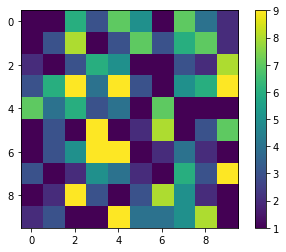

In [146]:
plt.imshow(examp)
plt.colorbar()

## solution attempt

In [42]:
np.eye(10, k=-8)[::-1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [151]:
map1 = copy.deepcopy(examp)
map1[0,0] = 0 # only count when enter
map1

array([[0, 1, 6, 3, 7, 5, 1, 7, 4, 2],
       [1, 3, 8, 1, 3, 7, 3, 6, 7, 2],
       [2, 1, 3, 6, 5, 1, 1, 3, 2, 8],
       [3, 6, 9, 4, 9, 3, 1, 5, 6, 9],
       [7, 4, 6, 3, 4, 1, 7, 1, 1, 1],
       [1, 3, 1, 9, 1, 2, 8, 1, 3, 7],
       [1, 3, 5, 9, 9, 1, 2, 4, 2, 1],
       [3, 1, 2, 5, 4, 2, 1, 6, 3, 9],
       [1, 2, 9, 3, 1, 3, 8, 5, 2, 1],
       [2, 3, 1, 1, 9, 4, 4, 5, 8, 1]])

In [152]:
# range(-8, 10):

map_ = map1
for i in range(-8, 10):
    to_check = np.eye(10, k=i)[::-1] == 1
    positions = np.where(to_check)
    pos_row, pos_col = positions
    
    # print(examp[to_check]) # ex: [6, 3, 2]
    # print(positions) # ex: (array([0, 1, 2]), array([2, 1, 0]))
    
    for kpos, node in enumerate(map_[to_check]):
        least_value = checkNode(node, pos_row[kpos], pos_col[kpos])
        map1[pos_row[kpos], pos_col[kpos]] = least_value

In [153]:
map1

array([[ 0,  1,  7, 10, 17, 22, 23, 30, 34, 36],
       [ 1,  4, 12, 11, 14, 21, 24, 30, 37, 38],
       [ 3,  4,  7, 13, 18, 19, 20, 23, 25, 33],
       [ 6, 10, 16, 17, 26, 22, 21, 26, 31, 40],
       [13, 14, 20, 20, 24, 23, 28, 27, 28, 29],
       [14, 17, 18, 27, 25, 25, 33, 28, 31, 36],
       [15, 18, 23, 32, 34, 26, 28, 32, 33, 34],
       [18, 19, 21, 26, 30, 28, 29, 35, 36, 43],
       [19, 21, 30, 29, 30, 31, 37, 40, 38, 39],
       [21, 24, 25, 26, 35, 35, 39, 44, 46, 40]])

In [311]:
def checkNode(nodeval, pos_row, pos_col):
    totvalue = 999999999
    
    # get from left and up positions
    pre_left_pos = (pos_row, pos_col - 1)
    pre_up_pos = (pos_row - 1, pos_col)
    
    # get left pos value
    if -1 in pre_left_pos:
        pre_left = 999999999
    else:
        pre_left = map_[pre_left_pos]
    
    # get up pos value
    if -1 in pre_up_pos:
        pre_up = 999999999
    else:
        pre_up = map_[pre_up_pos]
    
    post_left = pre_left + nodeval
    post_up = pre_up + nodeval
    
    totval = min(totvalue, post_left, post_up)
    
    return totval

In [312]:
assert checkNode(3, 1, 1) == 4
assert checkNode(6, 0, 2) == 7

AssertionError: 

## on real thing

In [157]:
with open('input/input_15.txt') as file:
    lines = [line.rstrip('\n') for line in file]

In [158]:
inpot = []
for line in lines:
    row = [int(c) for c in line]
    inpot.append(row)

inpot = np.array(inpot)

In [171]:
map0 = copy.deepcopy(inpot)
map0[0,0] = 0 # only count when enter
map0

array([[0, 4, 9, ..., 4, 9, 5],
       [7, 2, 6, ..., 9, 2, 5],
       [5, 1, 9, ..., 8, 9, 7],
       ...,
       [4, 5, 6, ..., 5, 9, 2],
       [9, 2, 9, ..., 2, 7, 3],
       [4, 7, 8, ..., 7, 9, 6]])

In [172]:
# range(-8, 10):

map_ = map0
for i in range(-98, 100):
    to_check = np.eye(100, k=i)[::-1] == 1
    positions = np.where(to_check)
    pos_row, pos_col = positions
    
    # print(examp[to_check]) # ex: [6, 3, 2]
    # print(positions) # ex: (array([0, 1, 2]), array([2, 1, 0]))
    
    for kpos, node in enumerate(map_[to_check]):
        least_value = checkNode(node, pos_row[kpos], pos_col[kpos])
        map_[pos_row[kpos], pos_col[kpos]] = least_value

In [173]:
map0

array([[  0,   4,  13, ..., 553, 562, 567],
       [  7,   6,  12, ..., 540, 542, 547],
       [ 12,   7,  16, ..., 529, 538, 545],
       ...,
       [590, 566, 504, ..., 655, 664, 666],
       [599, 568, 513, ..., 657, 664, 667],
       [603, 575, 521, ..., 664, 673, 673]])

## part 2

In [254]:
def increment(val, incr):
    
    if val + incr > 9:
        val = (val + incr) - 9
    else: 
        val += incr
    
    return val

In [255]:
assert increment(8, 7) == 6
assert increment(8, 3) == 2

In [201]:
test = np.ones((3, 3))

In [258]:
incrementarr = np.vectorize(increment)

In [264]:
assert (incrementarr(np.array([9,8,5]), 4) == np.array([4, 3, 9])).all()

In [204]:
# 8 9 1 2 3        
# 9 1 2 3 4
# 1 2 3 4 5
# 2 3 4 5 6
# 3 4 5 6 7

# ---increment map---
# 0 1 2 3 4
# 1 2 2 4 5
# 2 3 4 5 6
# 3 4 5 6 7
# 4 5 6 7 8

In [289]:
tt = np.array([8])
tt2 = np.ones((2, 2))

In [290]:
start = np.array([], dtype='uint8')
rowstack_list = []
colstack_list = []

inc_start = 0
inc_end = 5
for i in range(5):
    
    for j in range(inc_start, inc_end):
        incremented = incrementarr(tt2, j)
        rowstack_list.append(incremented)
    
    rowstack = np.hstack(rowstack_list)
    colstack_list.append(rowstack)
    
    rowstack_list = []
    rowstack = np.array([]) # reset rowstack and list for new rowline
    
    inc_start += 1
    inc_end += 1

In [292]:
np.vstack(colstack_list)

array([[1., 1., 2., 2., 3., 3., 4., 4., 5., 5.],
       [1., 1., 2., 2., 3., 3., 4., 4., 5., 5.],
       [2., 2., 3., 3., 4., 4., 5., 5., 6., 6.],
       [2., 2., 3., 3., 4., 4., 5., 5., 6., 6.],
       [3., 3., 4., 4., 5., 5., 6., 6., 7., 7.],
       [3., 3., 4., 4., 5., 5., 6., 6., 7., 7.],
       [4., 4., 5., 5., 6., 6., 7., 7., 8., 8.],
       [4., 4., 5., 5., 6., 6., 7., 7., 8., 8.],
       [5., 5., 6., 6., 7., 7., 8., 8., 9., 9.],
       [5., 5., 6., 6., 7., 7., 8., 8., 9., 9.]])

In [288]:
np.vstack([colstack_list])

array([[8, 9, 1, 2, 3],
       [9, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7]])

### check on real shit

In [513]:
# with open('input/input_15ex3.txt') as file:
#     lines = [line.rstrip('\n') for line in file]
    
# examp3 = []
# for line in lines:
#     row = [int(c) for c in line]
#     examp3.append(row)

# examp3 = np.array(examp3)

with open('input/input_15.txt') as file:
    lines = [line.rstrip('\n') for line in file]
    
rinput = []
for line in lines:
    row = [int(c) for c in line]
    rinput.append(row)

rinput = np.array(rinput)

In [364]:
input_inp = copy.deepcopy(examp3)

In [366]:
input_inp.shape

(100, 100)

In [367]:
start = np.array([], dtype='uint8')
rowstack_list = []
colstack_list = []

inc_start = 0
inc_end = 5
for i in range(5):
    
    for j in range(inc_start, inc_end):
        incremented = incrementarr(input_inp, j)
        rowstack_list.append(incremented)
    
    rowstack = np.hstack(rowstack_list)
    colstack_list.append(rowstack)
    
    rowstack_list = []
    rowstack = np.array([]) # reset rowstack and list for new rowline
    
    inc_start += 1
    inc_end += 1
    
full_gen_input = np.vstack(colstack_list)

In [ ]:
# 7448759796
# 6337648685

<b>try it</b>

In [372]:
with open('input/input_15ex2.txt') as file:
    lines = [line.rstrip('\n') for line in file]
    
examp2 = []
for line in lines:
    row = [int(c) for c in line]
    examp2.append(row)

examp2 = np.array(examp2)

(50, 50)

In [369]:
map0 = copy.deepcopy(full_gen_input)
map0[0, 0] = 0 # only count when enter
map0

array([[0, 4, 9, ..., 8, 4, 9],
       [7, 2, 6, ..., 4, 6, 9],
       [5, 1, 9, ..., 3, 4, 2],
       ...,
       [8, 9, 1, ..., 4, 8, 1],
       [4, 6, 4, ..., 1, 6, 2],
       [8, 2, 3, ..., 6, 8, 5]])

In [370]:
map_ = map0
for i in range(-498, 500):
    to_check = np.eye(500, k=i)[::-1] == 1
    positions = np.where(to_check)
    pos_row, pos_col = positions
    
    # print(examp[to_check]) # ex: [6, 3, 2]
    # print(positions) # ex: (array([0, 1, 2]), array([2, 1, 0]))
    
    for kpos, node in enumerate(map_[to_check]):
        least_value = checkNode(node, pos_row[kpos], pos_col[kpos])
        map_[pos_row[kpos], pos_col[kpos]] = least_value

In [371]:
map_

array([[   0,    4,   13, ..., 2399, 2403, 2412],
       [   7,    6,   12, ..., 2205, 2211, 2220],
       [  12,    7,   16, ..., 2190, 2194, 2196],
       ...,
       [2499, 2283, 2259, ..., 2894, 2902, 2903],
       [2503, 2289, 2263, ..., 2895, 2901, 2903],
       [2511, 2291, 2266, ..., 2901, 2909, 2908]])

In [325]:
np.eye(500, k=-498)[::-1] == 1

array([[False,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## test expand

In [378]:
def expand(input_inp):
    start = np.array([], dtype='uint8')
    rowstack_list = []
    colstack_list = []

    inc_start = 0
    inc_end = 5
    for i in range(5):

        for j in range(inc_start, inc_end):
            incremented = incrementarr(input_inp, j)
            rowstack_list.append(incremented)

        rowstack = np.hstack(rowstack_list)
        colstack_list.append(rowstack)

        rowstack_list = []
        rowstack = np.array([]) # reset rowstack and list for new rowline

        inc_start += 1
        inc_end += 1

    full_gen_input = np.vstack(colstack_list)
    
    return full_gen_input

In [376]:
test1 = np.array([
    [0]
])

In [382]:
expanded = expand(test1)
expanded

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

In [383]:
expanded.shape

(5, 5)

In [405]:
test2 = np.array([
    [0, 0],
    [0, 0]
])
expanded2 = expand(test2)
expanded2

array([[0, 0, 1, 1, 2, 2, 3, 3, 4, 4],
       [0, 0, 1, 1, 2, 2, 3, 3, 4, 4],
       [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
       [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
       [2, 2, 3, 3, 4, 4, 5, 5, 6, 6],
       [2, 2, 3, 3, 4, 4, 5, 5, 6, 6],
       [3, 3, 4, 4, 5, 5, 6, 6, 7, 7],
       [3, 3, 4, 4, 5, 5, 6, 6, 7, 7],
       [4, 4, 5, 5, 6, 6, 7, 7, 8, 8],
       [4, 4, 5, 5, 6, 6, 7, 7, 8, 8]])

In [411]:
expanded2.shape[0] / 5

2.0

In [426]:
for i in range(2, 12, 2):
    print(i)

2
4
6
8
10


In [493]:
def testo(expanded):
    shape = expanded.shape[0]
    step = int(shape / 5)

    for i in range(step, shape+1, step):
        for j in list(range(step, shape+step, step)):
            partition = expanded[i-step:i, j-step:j]
            
            # not for the last column
            if j != shape:
                next_partition = expanded[i-step:i, j:j+step]
                #print(f'{i-step}:{i},{j-step}:{j}', partition)
                
                assert (incrementarr(partition,1) == next_partition).all(), f'{i-step}:{i},{j-step}:{j} | {i-step}:{i}, {j}:{j+step}'
        
testo(expanded2)

In [514]:
rinput_expanded = expand(rinput)
rinput_expanded.shape

(500, 500)

In [515]:
testo(rinput_expanded)

In [517]:
rinput_expanded[0, 0] = 0
rinput_expanded

array([[0, 4, 9, ..., 8, 4, 9],
       [7, 2, 6, ..., 4, 6, 9],
       [5, 1, 9, ..., 3, 4, 2],
       ...,
       [8, 9, 1, ..., 4, 8, 1],
       [4, 6, 4, ..., 1, 6, 2],
       [8, 2, 3, ..., 6, 8, 5]])

In [518]:
map_ = copy.deepcopy(rinput_expanded)
for i in range(-498, 500):
    to_check = np.eye(500, k=i)[::-1] == 1
    positions = np.where(to_check)
    pos_row, pos_col = positions
    
    # print(examp[to_check]) # ex: [6, 3, 2]
    # print(positions) # ex: (array([0, 1, 2]), array([2, 1, 0]))
    
    for kpos, node in enumerate(map_[to_check]):
        least_value = checkNode(node, pos_row[kpos], pos_col[kpos])
        map_[pos_row[kpos], pos_col[kpos]] = least_value

In [520]:
map_[400,400]

2213